<a href="https://colab.research.google.com/github/E-Haroun/NaiveBayes_Algorithm_from_scratch/blob/main/iris_GaussNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-1 **Handle** **Data**

In [ ]:
import pandas as pd;
import numpy as np;
import random;
import math;
import matplotlib.pyplot as plt;

In [ ]:
def loadcsv(file):
    dataset = pd.read_csv(file);
    dataset = dataset.values
    return dataset

f="iris.csv"
print(loadcsv(f)[:5])


[[4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']]


In [ ]:
#Now we need to split the data into training and testing dataset.

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        np.random.seed(1)
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]


train,test = splitDataset(loadcsv(f),0.8)
print("==> train",train)
print("==> test",test)

==> train [array([6.7, 2.5, 5.8, 1.8, 'Iris-virginica'], dtype=object), array([6.3, 2.8, 5.1, 1.5, 'Iris-virginica'], dtype=object), array([4.9, 2.5, 4.5, 1.7, 'Iris-virginica'], dtype=object), array([6.3, 3.3, 6.0, 2.5, 'Iris-virginica'], dtype=object), array([4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], dtype=object), array([4.8, 3.0, 1.4, 0.3, 'Iris-setosa'], dtype=object), array([5.0, 3.0, 1.6, 0.2, 'Iris-setosa'], dtype=object), array([6.7, 3.0, 5.2, 2.3, 'Iris-virginica'], dtype=object), array([6.9, 3.1, 5.4, 2.1, 'Iris-virginica'], dtype=object), array([6.0, 2.7, 5.1, 1.6, 'Iris-versicolor'], dtype=object), array([6.5, 3.0, 5.8, 2.2, 'Iris-virginica'], dtype=object), array([4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], dtype=object), array([6.1, 2.8, 4.0, 1.3, 'Iris-versicolor'], dtype=object), array([5.5, 2.4, 3.8, 1.1, 'Iris-versicolor'], dtype=object), array([6.3, 3.4, 5.6, 2.4, 'Iris-virginica'], dtype=object), array([7.7, 2.8, 6.7, 2.0, 'Iris-virginica'], dtype=object), array([6.5, 3.2, 5.1, 

## 2-     **Separate Data By Class**

In [ ]:
#seperating as per the class

def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated


separated = separateByClass(loadcsv(f))
#Accessing seperated...
print(separated['Iris-virginica'])
print('Separated instances: {0}'.format(separated))


[array([6.3, 3.3, 6.0, 2.5, 'Iris-virginica'], dtype=object), array([5.8, 2.7, 5.1, 1.9, 'Iris-virginica'], dtype=object), array([7.1, 3.0, 5.9, 2.1, 'Iris-virginica'], dtype=object), array([6.3, 2.9, 5.6, 1.8, 'Iris-virginica'], dtype=object), array([6.5, 3.0, 5.8, 2.2, 'Iris-virginica'], dtype=object), array([7.6, 3.0, 6.6, 2.1, 'Iris-virginica'], dtype=object), array([4.9, 2.5, 4.5, 1.7, 'Iris-virginica'], dtype=object), array([7.3, 2.9, 6.3, 1.8, 'Iris-virginica'], dtype=object), array([6.7, 2.5, 5.8, 1.8, 'Iris-virginica'], dtype=object), array([7.2, 3.6, 6.1, 2.5, 'Iris-virginica'], dtype=object), array([6.5, 3.2, 5.1, 2.0, 'Iris-virginica'], dtype=object), array([6.4, 2.7, 5.3, 1.9, 'Iris-virginica'], dtype=object), array([6.8, 3.0, 5.5, 2.1, 'Iris-virginica'], dtype=object), array([5.7, 2.5, 5.0, 2.0, 'Iris-virginica'], dtype=object), array([5.8, 2.8, 5.1, 2.4, 'Iris-virginica'], dtype=object), array([6.4, 3.2, 5.3, 2.3, 'Iris-virginica'], dtype=object), array([6.5, 3.0, 5.5, 1

In [ ]:
#Calculate the mean
def mean(arr):
    return sum(arr)/float(len(arr))

numbers = [1,2,3,4,5]
print(numbers)
print(mean(numbers))

[1, 2, 3, 4, 5]
3.0


In [ ]:

def stdev(arr):
    avg=mean(arr)
    variance=sum([pow(x-avg,2) for x in arr])/float(len(arr)-1)
    return math.sqrt(variance)

numbers = [1,2,3.0,4.12,5]
print(numbers)
print(stdev(numbers))


[1, 2, 3.0, 4.12, 5]
1.6008997470172828


In [ ]:
#calculate mean and std classwise for each feature

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries


def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries


dataset = [[1,20,1], [2,21,0], [3,22,1], [4,22,0]]
summary = summarizeByClass(dataset)
print('Summary by class value:',summary);


Summary by class value: {1: [(2.0, 1.4142135623730951), (21.0, 1.4142135623730951)], 0: [(3.0, 1.4142135623730951), (21.5, 0.7071067811865476)]}


# 3- **Making Predictions**

In [ ]:
#    Calculate Gaussian Probability Density Function

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#Calculate Class Probabilities
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


summaries = {0:[(33, 2)], 1:[(9, 4)]}
inputVector = [9, '?']
probabilities = calculateClassProbabilities(summaries, inputVector)
print('Probabilities for each class:',probabilities)


Probabilities for each class: {0: 1.0731918678315302e-32, 1: 0.09973557010035818}


In [ ]:

#predicting the best label
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
inputVector = [1, '?']
result = predict(summaries, inputVector)
print('Prediction:',result)


Prediction: A


In [ ]:

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
testSet = [[1.1, '?'], [1.9, '?']]
predictions = getPredictions(summaries, testSet)
print('Predictions:',predictions)



Predictions: ['A', 'A']


In [ ]:

def sel_color(l):
    if l[-1]==0:
        return 'red'
    if l[-1]==1:
        return 'blue'

def sel_color_2(l):
    if l[0]==0:
        return 'red'
    if l[0]==1:
        return 'blue'


Accuracy: 66.66666666666666


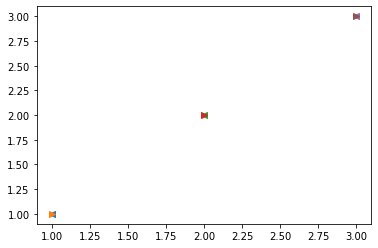

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        plt.scatter(testSet[x][1],testSet[x][2],marker='<', c=sel_color(testSet[x]))
        plt.scatter(testSet[x][1],testSet[x][2],marker='>', c=sel_color_2(predictions))
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'b', 'b']
accuracy = getAccuracy(testSet, predictions)
print('Accuracy:',accuracy)


In [ ]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column])

 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup


for i in range(len(dataset[0])-1):
      str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(loadcsv(f), len(loadcsv(f)[0])-1)

{'Iris-setosa': 0, 'Iris-versicolor': 2, 'Iris-virginica': 1}

{1: [(6.5897435897435885, 0.6854867159812615), (2.9666666666666663, 0.35193699595638844), (5.569230769230769, 0.58090394448011), (2.0179487179487174, 0.2722922142341268)], 2: [(5.897435897435898, 0.503402726445986), (2.8025641025641033, 0.3004270464795244), (4.253846153846153, 0.47397876581693427), (1.3256410256410258, 0.19697441554137876)], 0: [(5.024390243902438, 0.3215435334483327), (3.4170731707317072, 0.3942730266099815), (1.4902439024390244, 0.15621280044986788), (0.25121951219512195, 0.10982247315443273)]}
=======> Accuracy: 93.33333333333333%


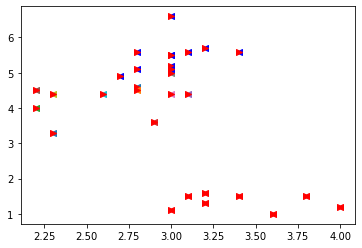

In [ ]:
def main():
    filename="iris.csv"
    dataset=loadcsv(filename)
    for i in range(len(dataset[0])-1):
      str_column_to_float(dataset, i)
    # convert class column to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    splitRatio = 0.8
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    #print("trinnnnnnnnnnnnnnnnnnnnnnnnnn",trainingSet)
    #print("testtttttttt",testSet)
    summaries = summarizeByClass(trainingSet)
    print(summaries)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('=======> Accuracy: {0}%'.format(accuracy))
    plt.show()
    '''
    # define a new record
    row = [5.7,2.9,4.2,1.3]
    # predict the label
    label = predict(summaries, row)
    print('Data=%s, Predicted: %s' % (row, label))
    '''

main()